In [ ]:
!pip install gdown
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: ker

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1iK2qzLQ3sLIDBq0WO3OjBkFxHy02sQEk' # The shareable link

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that I have everything after '='

1iK2qzLQ3sLIDBq0WO3OjBkFxHy02sQEk


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('merged_data.csv')  
an_ds = pd.read_csv('merged_data.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
an_ds.shape

(4202421, 18)

In [ ]:
an_ds.head()

,app_id,name,developer,publisher,positive,negative,average_forever,median_forever,languages,genre,ccu,tags,metacritic_score,total_recommendations,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,Valve,Valve,208048,5311,12189,213,"English, French, German, Italian, Spanish - Sp...",Action,13743,"{'Action': 5432, 'FPS': 4839, 'Multiplayer': 3...",88.0,130601.0,Counter-Strike,"Easy to learn, hard to master.",1,1


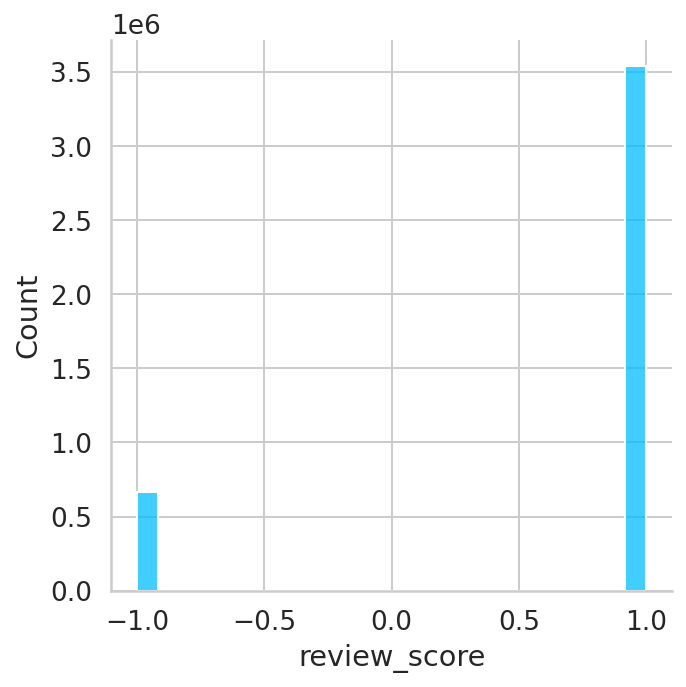

In [ ]:
sns.displot(an_ds.review_score)

In [ ]:
an_ds['review_type'] = an_ds['review_score'].apply(lambda x: "bad" if x == -1 else "good")

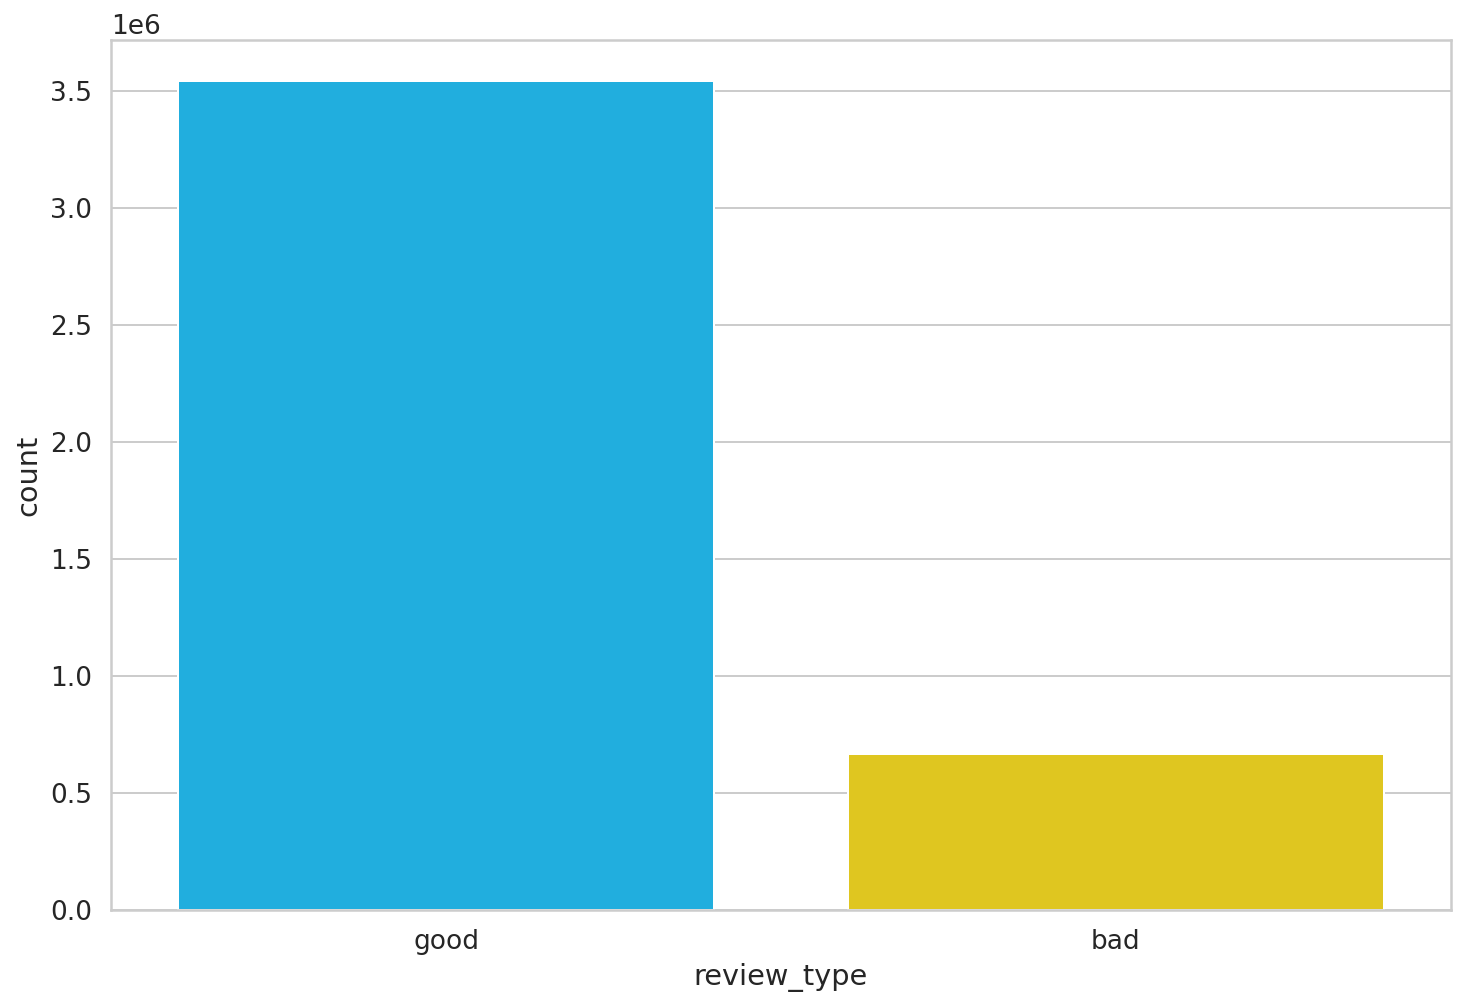

In [ ]:
sns.countplot(x = an_ds.review_type)

In [ ]:
good_reviews = an_ds[an_ds.review_type == 'good']
bad_reviews = an_ds[an_ds.review_type == 'bad']

good_reviews = good_reviews.assign(review_text = lambda d: d['review_text'].astype(str))
bad_reviews = bad_reviews.assign(review_text = lambda d: d['review_text'].astype(str))

In [ ]:
good_reviews_text = " ".join(good_reviews.review_text.to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews.review_text.to_numpy().tolist())

In [ ]:
#Universal Sentence Encoder
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
good_df = good_reviews.sample(n = len(bad_reviews), random_state = RANDOM_SEED)
bad_df = bad_reviews

In [ ]:
print(good_df.shape, bad_df.shape)

(662886, 19) (662886, 19)


In [ ]:
review_df = pd.concat([good_df, bad_df]).reset_index(drop = True)

In [ ]:
review_df = review_df[["review_text", "review_type"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
type_one_hot = OneHotEncoder(sparse = False).fit_transform(
    review_df.review_type.to_numpy().reshape(-1, 1)
)

In [ ]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(review_df.review_text, type_one_hot, test_size = 0.1, random_state = RANDOM_SEED)

In [ ]:
X_train = []
for r in tqdm(train_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 1193194/1193194 [4:40:41<00:00, 70.85it/s]


In [ ]:
X_test = []
for r in tqdm(test_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 132578/132578 [30:59<00:00, 71.29it/s]


In [ ]:
# Sentiment Analysis
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units = 256,
    input_shape = (X_train.shape[1], ),
    activation = 'relu'
  )
)

model.add(
  keras.layers.Dropout(rate = 0.5)
)

model.add(
  keras.layers.Dense(
    units = 128,
    activation = 'relu'
  )
)
model.add(
  keras.layers.Dropout(rate = 0.5)
)

model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=True
)

Epoch 1/10
67118/67118 [==============================] - 195s 3ms/step - loss: 0.4138 - accuracy: 0.7951 - val_loss: 0.3889 - val_accuracy: 0.8062
Epoch 2/10
67118/67118 [==============================] - 194s 3ms/step - loss: 0.3984 - accuracy: 0.8046 - val_loss: 0.3817 - val_accuracy: 0.8096
Epoch 3/10
67118/67118 [==============================] - 195s 3ms/step - loss: 0.3926 - accuracy: 0.8076 - val_loss: 0.3780 - val_accuracy: 0.8123
Epoch 4/10
67118/67118 [==============================] - 195s 3ms/step - loss: 0.3886 - accuracy: 0.8100 - val_loss: 0.3765 - val_accuracy: 0.8123
Epoch 5/10
67118/67118 [==============================] - 195s 3ms/step - loss: 0.3863 - accuracy: 0.8114 - val_loss: 0.3788 - val_accuracy: 0.8146
Epoch 6/10
67118/67118 [==============================] - 195s 3ms/step - loss: 0.3833 - accuracy: 0.8127 - val_loss: 0.3725 - val_accuracy: 0.8152
Epoch 7/10
67118/67118 [==============================] - 194s 3ms/step - loss: 0.3817 - accuracy: 0.8141 - val_

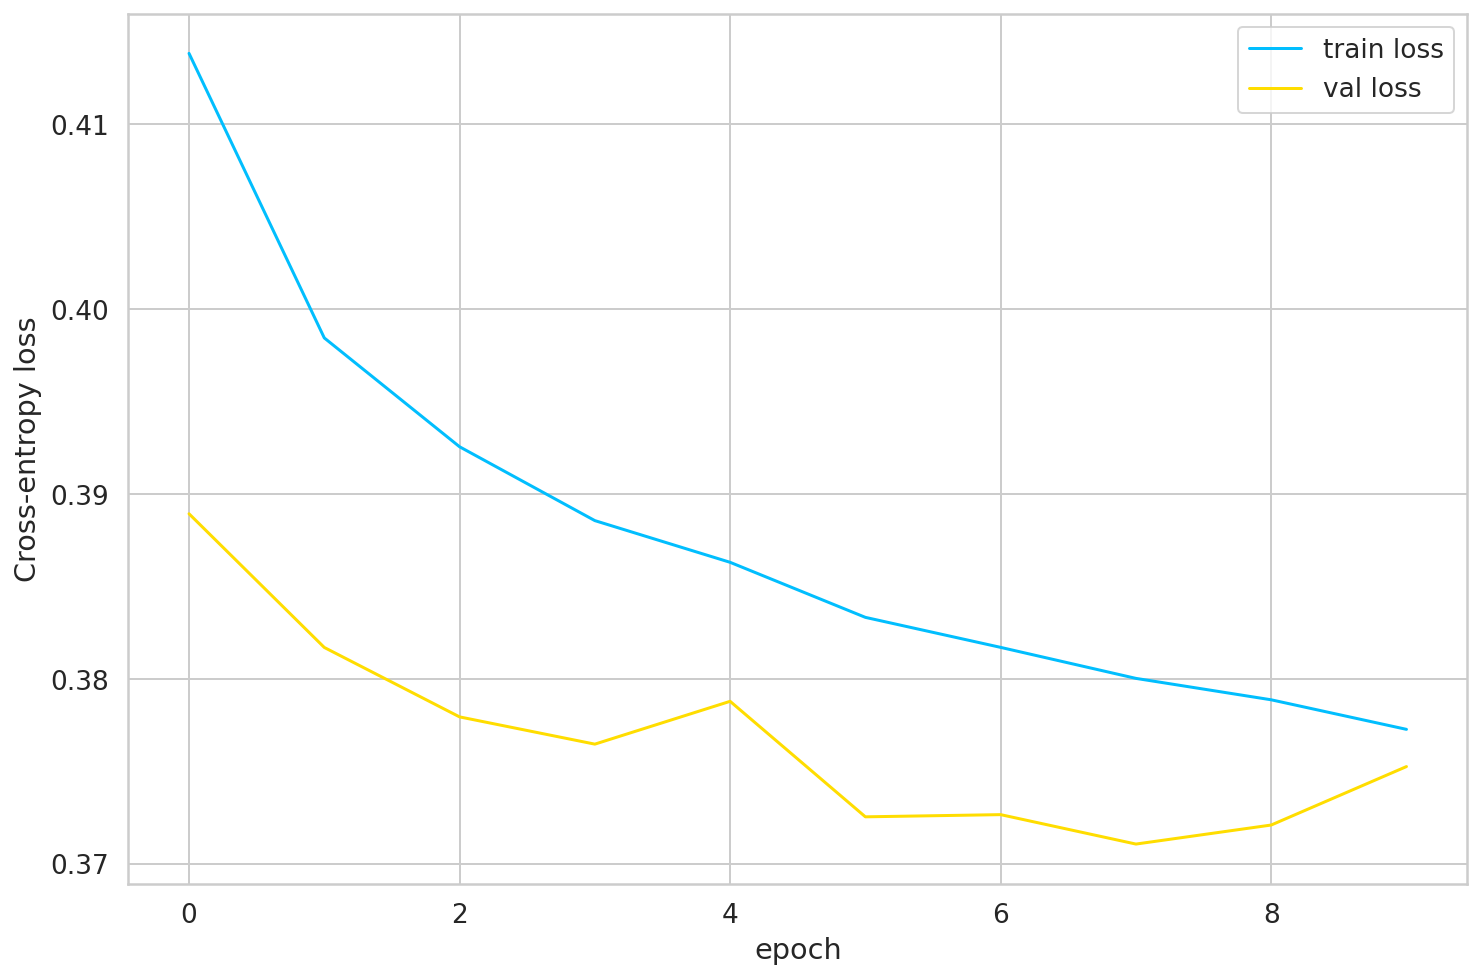

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

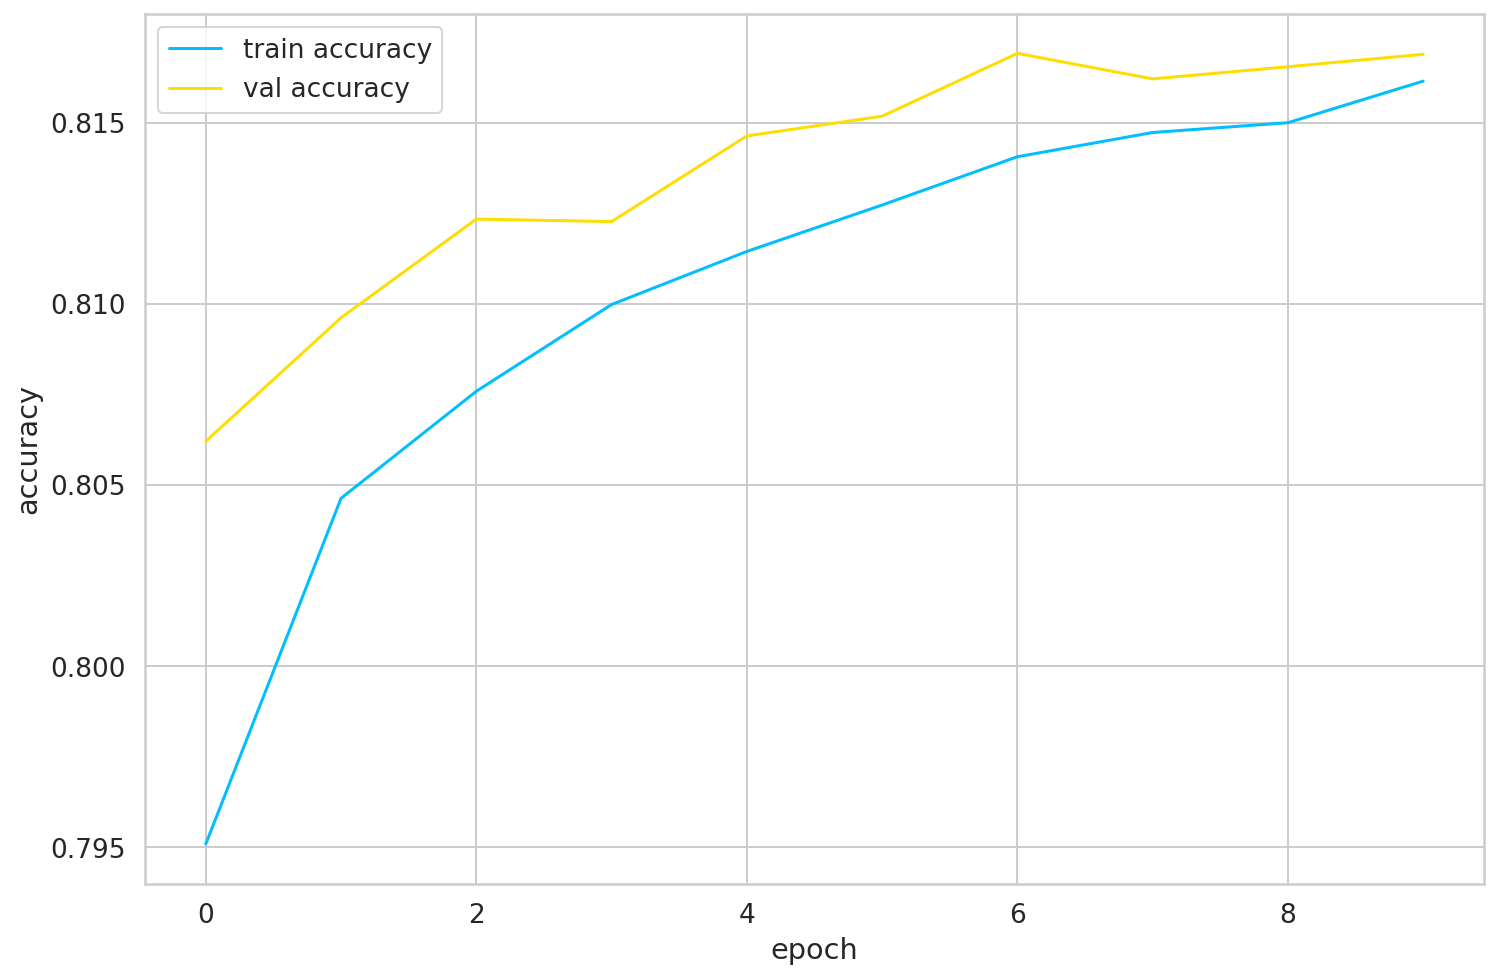

In [ ]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

4144/4144 [==============================] - 9s 2ms/step - loss: 0.3741 - accuracy: 0.8179


[0.37407186627388, 0.8178657293319702]